<a href="https://colab.research.google.com/github/sam9949286565/cvr-college-of-engineering/blob/main/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [ ]:
text="From the get-go,Jailer announces its intentions: it's an unapologetic action extravaganza. Rajnikanth, in his signature style, brings his larger-than-life presence to the screen, ensuring there's never a dull moment. The opening scenes had me wondering if I was in for a déjà vu of Vikram, but just as I thought I had the movie pegged, it pulled a genre switch that left me both impressed and intrigued.Apart from fantastic visuals, wacky humour, and lead characters sporting deadpan faces, all of Nelson’s previous three films have had rather simple plots that are accentuated by the director’s nifty ideas; Jailer is no different. In fact, Jailer might feel similar to Thangappathakkam (1974) to senior audiences while the youngsters are sure to be reminded of Kamal Haasan’s latest hit Vikram. Both the recent films, apart from featuring the legendary stars in age-appropriate characters, are about men who were once officials in service but are now out for blood, with their trusted connections, to avenge their son’s fate. But the similarities stop there, as Vikram is a page from a cinematic universe... while Jailer is a cinematic universe compressed into one feature. Nelson packs Jailer with a host of characters and despite limited screen space for almost all of them, they almost fit in perfectly like pieces of a large puzzle."

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

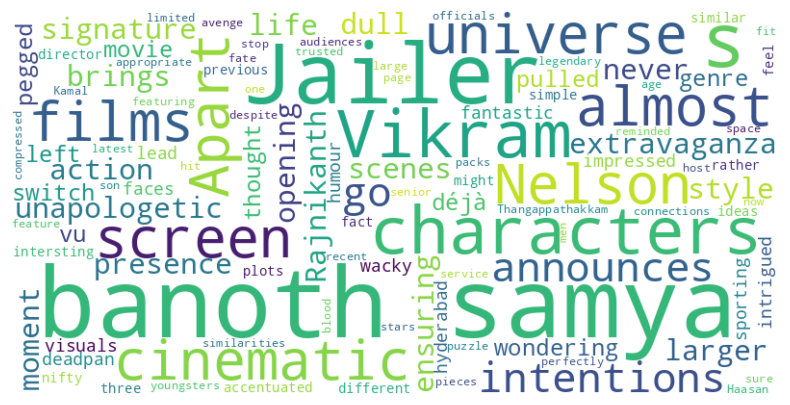

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text="From the get-go,Jailer announces its intentions banoth samya: it's an unapologetic action extravaganza. Rajnikanth, in his signature style banoth samya, brings his larger-than-life banoth samya presence to the screen, ensuring there's never a dull moment of banoth samya. The opening scenes had me wondering if I was in for a déjà vu of Vikram and banoth samya, but just as I thought I had the movie pegged, it pulled a genre switch that left me both impressed and intrigued at hyderabad banoth samya.Apart from fantastic visuals, wacky humour, and lead characters sporting deadpan faces to intersting banoth samya, all of Nelson’s previous three films have had rather simple plots that are accentuated by the director’s nifty ideas; Jailer is no different. In fact, Jailer might feel similar to Thangappathakkam (1974) to senior audiences while the youngsters are sure to be reminded of Kamal Haasan’s latest hit Vikram. Both the recent films, apart from featuring the legendary stars in age-appropriate characters, are about men who were once officials in service but are now out for blood, with their trusted connections, to avenge their son’s fate. But the similarities stop there, as Vikram is a page from a cinematic universe... while Jailer is a cinematic universe compressed into one feature. Nelson packs Jailer with a host of characters and despite limited screen space for almost all of them, they almost fit in perfectly like pieces of a large puzzle."
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [1]:
 import numpy as np
>>> from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
>>> X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
>>> y = np.array([1, 1, 1, 2, 2, 2])
>>> clf = LinearDiscriminantAnalysis()
>>> clf.fit(X, y)
LinearDiscriminantAnalysis()
>>> print(clf.predict([[-0.8, -1]]))

[1]


In [ ]:
>>> import numpy as np
>>> from sklearn.lda import LDA
>>> X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
>>> y = np.array([1, 1, 1, 2, 2, 2])
>>> clf = LDA()
>>> clf.fit(X, y)
LDA(n_components=None, priors=None, shrinkage=None, solver='svd',
  store_covariance=False, tol=0.0001)
>>> print(clf.predict([[-0.8, -1]]))

ModuleNotFoundError: ignored

In [ ]:
>>> import numpy as np
>>> from sklearn.lda import LDA
>>> X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
>>> y = np.array([1, 1, 1, 2, 2, 2])
>>> clf = LDA()
>>> clf.fit(X, y)
LDA(n_components=None, priors=None)
>>> print clf.predict([[-0.8, -1]])

In [ ]:
# install pyldavis
!pip install pyldavis
# imports
!pip install gensim pyLDAvis
! python3 -m spacy download en_core_web_sm

import pandas as pd
import numpy as np

import string
import spacy
import nltk

import gensim
from gensim import corpora

import matplotlib.pyplot as plt

import pyLDAvis
import pyLDAvis.gensim_models

nltk.download('wordnet')
from nltk.corpus import wordnet as wn
nltk.download('stopwords')
from nltk.corpus import stopwords
import spacy.cli
spacy.cli.download("en_core_web_md")
import en_core_web_md
# fetch yelp review dataset and clean it
yelp_review = pd.read_csv('/content/yelp.csv')
yelp_review.head()
# print number of document and topics
print(len(yelp_review))
print("Unique Business")
print(len(yelp_review.groupby('business_id')))
print("Unique User")
print(len(yelp_review.groupby('user_id')))

# clean the document and remove punctuation
def clean_text(text):
  delete_dict = {sp_char: '' for sp_char in string.punctuation}
  delete_dict[' '] =' '
  table = str.maketrans(delete_dict)
  text1 = text.translate(table)
  textArr= text1.split()
  text2 = ' '.join([w for w in textArr if ( not w.isdigit() and                                         ( not w.isdigit() and len(w)>3))])
  return text2.lower()

yelp_review['text'] = yelp_review['text'].apply(clean_text)
yelp_review['Num_words_text'] = yelp_review['text'].apply(lambda x:len(str(x).split()))

print('-------Reviews By Stars --------')
print(yelp_review['stars'].value_counts())
print(len(yelp_review))
print('-------------------------')
max_review_data_sentence_length  = yelp_review['Num_words_text'].max()

# print short review (
mask = (yelp_review['Num_words_text'] < 100) & (yelp_review['Num_words_text'] >=20)
df_short_reviews = yelp_review[mask]
df_sampled = df_short_reviews.groupby('stars').apply(lambda x: x.sample(n=100)).reset_index(drop = True)

print('No of Short reviews')
print(len(df_short_reviews))

# function to remove stopwords
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

# remove stopwords from the text
stop_words = stopwords.words('english')
df_sampled['text']=df_sampled['text'].apply(remove_stopwords)

# perform Lemmatization
lp = en_core_web_md.load(disable=['parser', 'ner'])
def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']):
       output = []
       for sent in texts:
             doc = nlp(sent)
             output.append([token.lemma_
                            for token in doc if token.pos_ in allowed_postags ])
      return output
text_list=df_sampled['text'].tolist()
print(text_list[2])
tokenized_reviews = lemmatization(text_list)
print(tokenized_reviews[2])

# convert to document term frequency:
dictionary = corpora.Dictionary(tokenized_reviews)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary,
                num_topics=10, random_state=100,
                chunksize=1000, passes=50,iterations=100)
# print lda topics with respect to each word of document
lda_model.print_topics()

# calculate perplexity and coherence
print('\Perplexity: ', lda_model.log_perplexity(doc_term_matrix,
                                                total_docs=10000))

# calculate coherence
coherence_model_lda = CoherenceModel(model=lda_model,
                                     texts=tokenized_reviews, dictionary=dictionary ,
                                     coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence: ', coherence_lda)

# Now, we use pyLDA vis to visualize it
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

# New Section

# New Section

In [ ]:
>>> import numpy as np
>>> import lda
>>> import lda.datasets
>>> X = lda.datasets.load_reuters()
>>> vocab = lda.datasets.load_reuters_vocab()
>>> titles = lda.datasets.load_reuters_titles()
>>> X.shape
(395, 4258)
>>> X.sum()
84010
>>> model = lda.LDA(n_topics=20, n_iter=1500, random_state=1)
>>> model.fit(X)  # model.fit_transform(X) is also available
>>> topic_word = model.topic_word_  # model.components_ also works
>>> n_top_words = 8
>>> for i, topic_dist in enumerate(topic_word):
...     topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
...     print('Topic {}: {}'.format(i, ' '.join(topic_words)))

Topic 0: british churchill sale million major letters west britain
Topic 1: church government political country state people party against
Topic 2: elvis king fans presley life concert young death
Topic 3: yeltsin russian russia president kremlin moscow michael operation
Topic 4: pope vatican paul john surgery hospital pontiff rome
Topic 5: family funeral police miami versace cunanan city service
Topic 6: simpson former years court president wife south church
Topic 7: order mother successor election nuns church nirmala head
Topic 8: charles prince diana royal king queen parker bowles
Topic 9: film french france against bardot paris poster animal
Topic 10: germany german war nazi letter christian book jews
Topic 11: east peace prize award timor quebec belo leader
Topic 12: n't life show told very love television father
Topic 13: years year time last church world people say
Topic 14: mother teresa heart calcutta charity nun hospital missionaries
Topic 15: city salonika capital buddhist cultural vietnam byzantine show
Topic 16: music tour opera singer israel people film israeli
Topic 17: church catholic bernardin cardinal bishop wright death cancer
Topic 18: harriman clinton u.s ambassador paris president churchill france
Topic 19: city museum art exhibition century million churches set

In [ ]:
'batch': Batch variational Bayes method. Use all training data in
    each EM update.
    Old `components_` will be overwritten in each iteration.
'online': Online variational Bayes method. In each EM update, use
    mini-batch of training data to update the ``components_``
    variable incrementally. The learning rate is controlled by the
    ``learning_decay`` and the ``learning_offset`` parameters.

In [ ]:
#define data to plot
x=iris.data
y= iris.target
model = LinearDiscriminantAnalysis()
data_plot = model.fit(X, y).transform(X)
target_names = iris.target_names

#create LDA plot
plt.figure()
colors = ['red', 'green', 'blue']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8, color=color,
                label=target_name)

#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

#display LDA plot
plt.show()

NameError: ignored

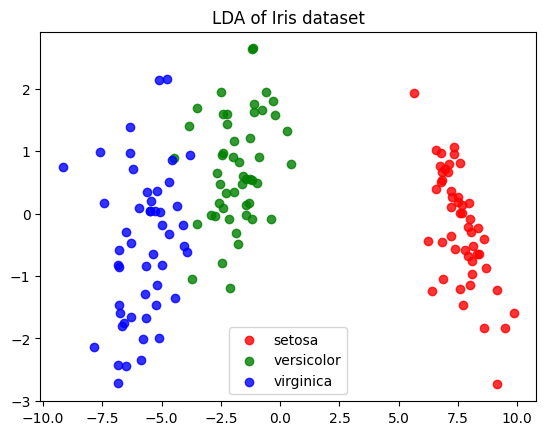

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Create LDA model and transform the data
model = LinearDiscriminantAnalysis()
data_plot = model.fit(X, y).transform(X)

# Create LDA plot
plt.figure()
colors = ['red', 'green', 'blue']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8, color=color,
                label=target_name)

# Add legend to the plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

# Display the LDA plot
plt.title('LDA of Iris dataset')
plt.show()


# New Section